In [1]:
%matplotlib inline
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [2]:
domain = xr.open_dataset(os.path.join('/p/work1/gergel/lwe', 
                                      'domain.lnd.wr50a_ar9v4.100920.nc'))
grid = xr.open_dataset(os.path.join('/p/home/gergel/data/25km', 
                                      'griddata_wr50a_130607.nc'))

In [3]:
plot_direc = '/p/home/gergel/plots/chapter2'

extract area from domain file for calculating permafrost area

In [4]:
gridcell_area = grid['AREA'].rename({'doma_ny': 'nj', 'doma_nx': 'ni'}) # in radian2

In [5]:
tsoi_hist_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/TSOI/arctic', 
                                                'b.e11.B20TRC5CNBDRD.f09_g16*'),
                                  concat_dim='ensemble_member')
tsoi_hist = tsoi_hist_file['TSOI'].sel(time=slice('1976-09-01', '2005-08-31'))


tsoi_2pt0_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/TSOI/arctic', 
                                                'b.e11.BRCP26C5CNBDRD.f09_g16.2pt0degC*'),
                                  concat_dim='ensemble_member')
tsoi_2pt0 = tsoi_2pt0_file['TSOI']

tsoi_future_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/TSOI/arctic', 
                                        'b.e11.BRCP85C5CNBDRD.f09_g16.*.clm2.h0.TSOI.200601-210012*'), 
                                    concat_dim='ensemble_member')
tsoi_future = tsoi_future_file['TSOI']

In [6]:
tsoi_1pt5_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/TSOI/arctic', 
                                                'b.e11.BRCP26C5CNBDRD.f09_g16.1pt5degC.*.clm2.h0.TSOI.2006*'),
                                  concat_dim='ensemble_member')
tsoi_1pt5 = tsoi_1pt5_file['TSOI']

In [7]:
soil_depths = tsoi_hist.levgrnd.values # in m 

using annual mean soil temperature (MST) from Slater and Lawrence 2013 (they found that the permafrost area found using MST versus the TSL approach was extremely similar for most climate models except for three, and CESM was not one of them) 

for now use layer 11, which is 4.74 m below the surface, `soil_depths[10]`

In [8]:
mst_hist = tsoi_hist.groupby('time.year').mean('time').isel(levgrnd=10)
mst_1pt5 = tsoi_1pt5.groupby('time.year').mean('time').isel(levgrnd=10)
mst_2pt0 = tsoi_2pt0.groupby('time.year').mean('time').isel(levgrnd=10)
mst_future = tsoi_future.groupby('time.year').mean('time').isel(levgrnd=10)

In [9]:
perm_area_hist = gridcell_area.where(mst_hist <= 273.15).sum(['nj', 'ni'])
perm_area_1pt5 = gridcell_area.where(mst_1pt5 <= 273.15).sum(['nj', 'ni'])
perm_area_2pt0 = gridcell_area.where(mst_2pt0 <= 273.15).sum(['nj', 'ni'])
perm_area_future = gridcell_area.where(mst_future <= 273.15).sum(['nj', 'ni'])

In [10]:
sk_to_msk = 1000000
perm_area_hist_mean = (perm_area_hist.mean('ensemble_member')/sk_to_msk).load()
perm_area_hist_max = (perm_area_hist.max('ensemble_member')/sk_to_msk).load()
perm_area_hist_min = (perm_area_hist.min('ensemble_member')/sk_to_msk).load()

/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)


In [11]:
perm_area_1pt5_mean = (perm_area_1pt5.mean('ensemble_member')/sk_to_msk).load()
perm_area_1pt5_max = (perm_area_1pt5.max('ensemble_member')/sk_to_msk).load()
perm_area_1pt5_min = (perm_area_1pt5.min('ensemble_member')/sk_to_msk).load()

In [12]:
perm_area_2pt0_mean = (perm_area_2pt0.mean('ensemble_member')/sk_to_msk).load()
perm_area_2pt0_max = (perm_area_2pt0.max('ensemble_member')/sk_to_msk).load()
perm_area_2pt0_min = (perm_area_2pt0.min('ensemble_member')/sk_to_msk).load()

In [13]:
perm_area_future_mean = (perm_area_future.mean('ensemble_member')/sk_to_msk).load()
perm_area_future_max = (perm_area_future.max('ensemble_member')/sk_to_msk).load()
perm_area_future_min = (perm_area_future.min('ensemble_member')/sk_to_msk).load()

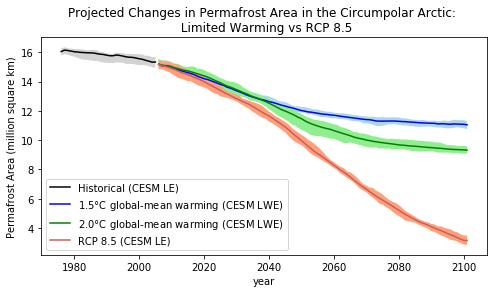

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
perm_area_hist_mean.plot(label='Historical (CESM LE)', color='black')
perm_area_1pt5_mean.plot(label='$1.5\degree$C global-mean warming (CESM LWE)', color='blue')
perm_area_2pt0_mean.plot(label='$2.0\degree$C global-mean warming (CESM LWE)', color='green')
perm_area_future_mean.plot(label='RCP 8.5 (CESM LE)', color='indianred')
axes.fill_between(perm_area_hist_mean.year.values, 
                  perm_area_hist_max, 
                  perm_area_hist_min,
                  facecolor='lightgrey')
axes.fill_between(perm_area_1pt5_mean.year.values, 
                  perm_area_1pt5_max, 
                  perm_area_1pt5_min,
                  facecolor='lightblue')
axes.fill_between(perm_area_2pt0_mean.year.values, 
                  perm_area_2pt0_max, 
                  perm_area_2pt0_min,
                  facecolor='lightgreen')
axes.fill_between(perm_area_future_mean.year.values, 
                  perm_area_future_max, 
                  perm_area_future_min,
                  facecolor='lightsalmon')
plt.ylabel('Permafrost Area (million square km)')
plt.title('Projected Changes in Permafrost Area in the Circumpolar Arctic: \n Limited Warming vs RCP 8.5')
axes.legend()

fig.savefig(os.path.join(plot_direc, 
                         'permafrost_area_change.png'), dpi=200)

In [23]:
tbot_hist_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/TBOT/arctic', 
                                                'b.e11.B20TRC5CNBDRD.f09_g16*'),
                                  concat_dim='ensemble_member')
tbot_hist = tbot_hist_file['TBOT'].sel(time=slice('1976-09-01', '2005-08-31'))


tbot_2pt0_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/TBOT/arctic', 
                                                'b.e11.BRCP26C5CNBDRD.f09_g16.2pt0degC*'),
                                  concat_dim='ensemble_member')
tbot_2pt0 = tbot_2pt0_file['TBOT']

tbot_future_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/TBOT/arctic', 
                                        'b.e11.BRCP85C5CNBDRD.f09_g16.*.clm2.h0.TBOT.200601-210012*'), 
                                    concat_dim='ensemble_member')
tbot_future = tbot_future_file['TBOT']

In [24]:
tbot_1pt5_file = xr.open_mfdataset(os.path.join('/p/work1/gergel/lwe/TBOT/arctic', 
                                                'b.e11.BRCP26C5CNBDRD.f09_g16.1pt5degC.*.clm2.h0.TBOT.2006*'),
                                  concat_dim='ensemble_member')
tbot_1pt5 = tbot_1pt5_file['TBOT']

In [25]:
tbot_hist_mean = tbot_hist.mean('ensemble_member').mean('time')

In [33]:
tbot_1pt5_diff = tbot_1pt5.groupby('time.year').mean('time') - tbot_hist_mean
tbot_1pt5_diff_mean = tbot_1pt5_diff.mean('ensemble_member').mean(['nj', 'ni'])

tbot_2pt0_diff = tbot_2pt0.groupby('time.year').mean('time') - tbot_hist_mean
tbot_2pt0_diff_mean = tbot_2pt0_diff.mean('ensemble_member').mean(['nj', 'ni'])

tbot_future_diff = tbot_future.groupby('time.year').mean('time') - tbot_hist_mean
tbot_future_diff_mean = tbot_future_diff.mean('ensemble_member').mean(['nj', 'ni'])

In [34]:
tbot_1pt5_diff_mean = tbot_1pt5_diff_mean.load()
tbot_2pt0_diff_mean = tbot_2pt0_diff_mean.load()
tbot_future_diff_mean = tbot_future_diff_mean.load()

/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/p/home/gergel/miniconda3/envs/pangeo_onyx/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [43]:
tbot_1pt5_end = tbot_1pt5_diff_mean.values[-2]
tbot_2pt0_end = tbot_2pt0_diff_mean.values[-2]
tbot_future_end = tbot_future_diff_mean.values[-2]

In [48]:
# start, stop, num=50
tbot_1pt5_x = np.linspace(0, tbot_1pt5_end, len(tbot_1pt5_diff_mean.values))
tbot_2pt0_x = np.linspace(0, tbot_2pt0_end, len(tbot_1pt5_diff_mean.values))
tbot_future_x = np.linspace(0, tbot_future_end, len(tbot_1pt5_diff_mean.values))

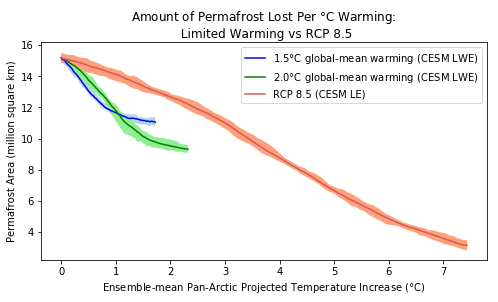

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
# perm_area_1pt5_mean.plot(label='$1.5\degree$C global-mean warming (CESM LWE)', color='blue')
plt.plot(tbot_1pt5_x, perm_area_1pt5_mean, label='$1.5\degree$C global-mean warming (CESM LWE)', color='blue')
plt.plot(tbot_2pt0_x, perm_area_2pt0_mean, label='$2.0\degree$C global-mean warming (CESM LWE)', color='green')
plt.plot(tbot_future_x, perm_area_future_mean, label='RCP 8.5 (CESM LE)', color='indianred')
# perm_area_2pt0_mean.plot(label='$2.0\degree$C global-mean warming (CESM LWE)', color='green')
# perm_area_future_mean.plot(label='RCP 8.5 (CESM LE)', color='indianred')
axes.fill_between(tbot_1pt5_x, 
                  perm_area_1pt5_max, 
                  perm_area_1pt5_min,
                  facecolor='lightblue')
axes.fill_between(tbot_2pt0_x, 
                  perm_area_2pt0_max, 
                  perm_area_2pt0_min,
                  facecolor='lightgreen')
axes.fill_between(tbot_future_x, 
                  perm_area_future_max, 
                  perm_area_future_min,
                  facecolor='lightsalmon')
plt.ylabel('Permafrost Area (million square km)')
plt.xlabel('Ensemble-mean Pan-Arctic Projected Temperature Increase ($\degree$C)')
plt.title('Amount of Permafrost Lost Per $\degree$C Warming: \n Limited Warming vs RCP 8.5')
axes.legend()

fig.savefig(os.path.join(plot_direc, 
                         'permafrost_area_deg_warming.png'), dpi=200)